<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Fraudulent_data_pre_processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/Fraudulent_E-Commerce_Transaction_Data_2.csv")
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


1. Basic Cleaning

In [ ]:
df = df.drop(['Transaction ID', 'Customer ID', 'Transaction Date', 'IP Address', 'Shipping Address', 'Billing Address', 'Customer Location'] , axis=1)

In [ ]:
df.isnull().sum()

,0
Transaction Amount,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Device Used,0
Is Fraudulent,0
Account Age Days,0
Transaction Hour,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    if df[col].nunique() < 50:
        print(df[col].unique())
    else:
        print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 30)

Unique values in column 'Transaction Amount':
Number of unique values: 18375
------------------------------
Unique values in column 'Payment Method':
['PayPal' 'credit card' 'debit card' 'bank transfer']
------------------------------
Unique values in column 'Product Category':
['electronics' 'toys & games' 'clothing' 'home & garden' 'health & beauty']
------------------------------
Unique values in column 'Quantity':
[1 3 5 4 2]
------------------------------
Unique values in column 'Customer Age':
Number of unique values: 74
------------------------------
Unique values in column 'Device Used':
['desktop' 'tablet' 'mobile']
------------------------------
Unique values in column 'Is Fraudulent':
[0 1]
------------------------------
Unique values in column 'Account Age Days':
Number of unique values: 365
------------------------------
Unique values in column 'Transaction Hour':
[23  0  8 20 15 13  4 22 12 19  2 16 14 17  5 11 21  3  6  7  9 18 10  1]
------------------------------


In [ ]:
df_encoded = df.copy()


payment_mapping = {'PayPal': 3, 'credit card': 2, 'debit card': 1, 'bank transfer': 0}
df_encoded['Payment Method'] = df_encoded['Payment Method'].map(payment_mapping)


product_mapping = {'electronics': 4, 'toys & games': 3, 'clothing': 2, 'home & garden': 1, 'health & beauty': 0}
df_encoded['Product Category'] = df_encoded['Product Category'].map(product_mapping)

device_mapping = {'desktop': 2, 'tablet': 1, 'mobile': 0}
df_encoded['Device Used'] = df_encoded['Device Used'].map(device_mapping)

In [ ]:
df_encoded.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,3,4,1,40,2,0,282,23
1,301.34,2,4,3,35,1,0,223,0
2,340.32,1,3,5,29,2,0,360,8
3,95.77,2,4,5,45,0,0,325,20
4,77.45,2,2,5,42,2,0,116,15


2. Feature Visualization

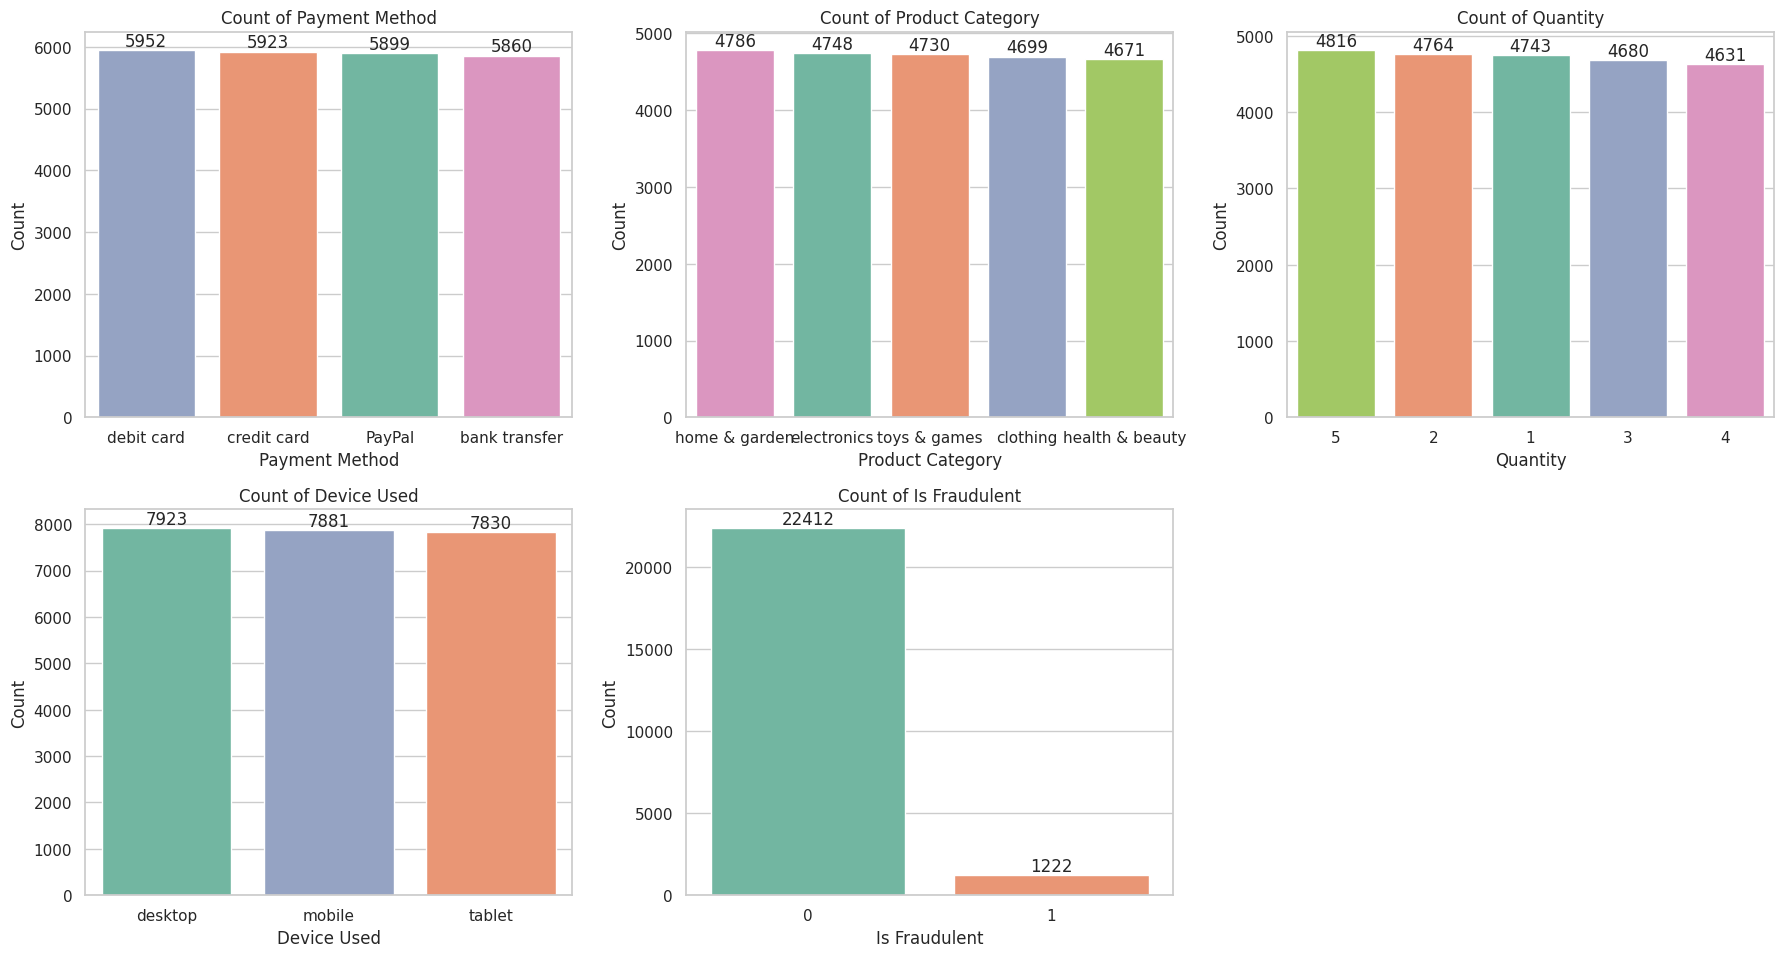

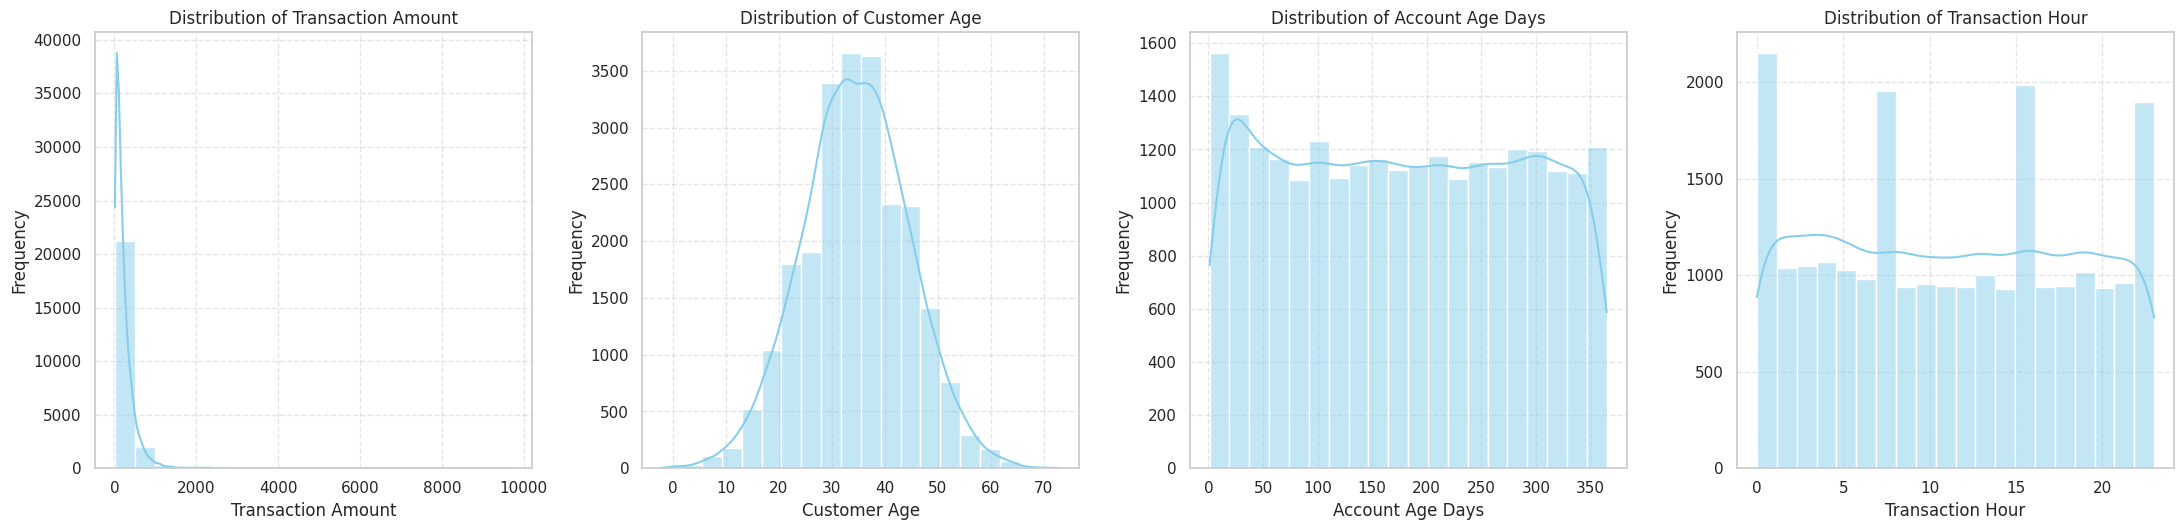

In [ ]:
sns.set(style="whitegrid")


categorical_cols = [
   'Payment Method', 'Product Category', 'Quantity', 'Device Used', 'Is Fraudulent'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    order = df[col].value_counts().index if df[col].nunique() < 10 else sorted(df[col].unique())
    ax = axes[i]

    sns.countplot(data=df, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    if df[col].nunique() > 5:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


numerical_cols = [
    'Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour'
]

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most numerical features show reasonable variance except for Transaction Amount, which is highly right-skewed and may benefit from log transformation.
All categorical features have relatively balanced distributions except for Is Fraudulent, which is highly imbalanced (~5% fraud). No features exhibit extreme dominance (>90%), so no columns need to be removed solely due to imbalance.

In [ ]:
df_encoded.dtypes

,0
Transaction Amount,float64
Payment Method,int64
Product Category,int64
Quantity,int64
Customer Age,int64
Device Used,int64
Is Fraudulent,int64
Account Age Days,int64
Transaction Hour,int64


3. Spearman or Pearson Correlation

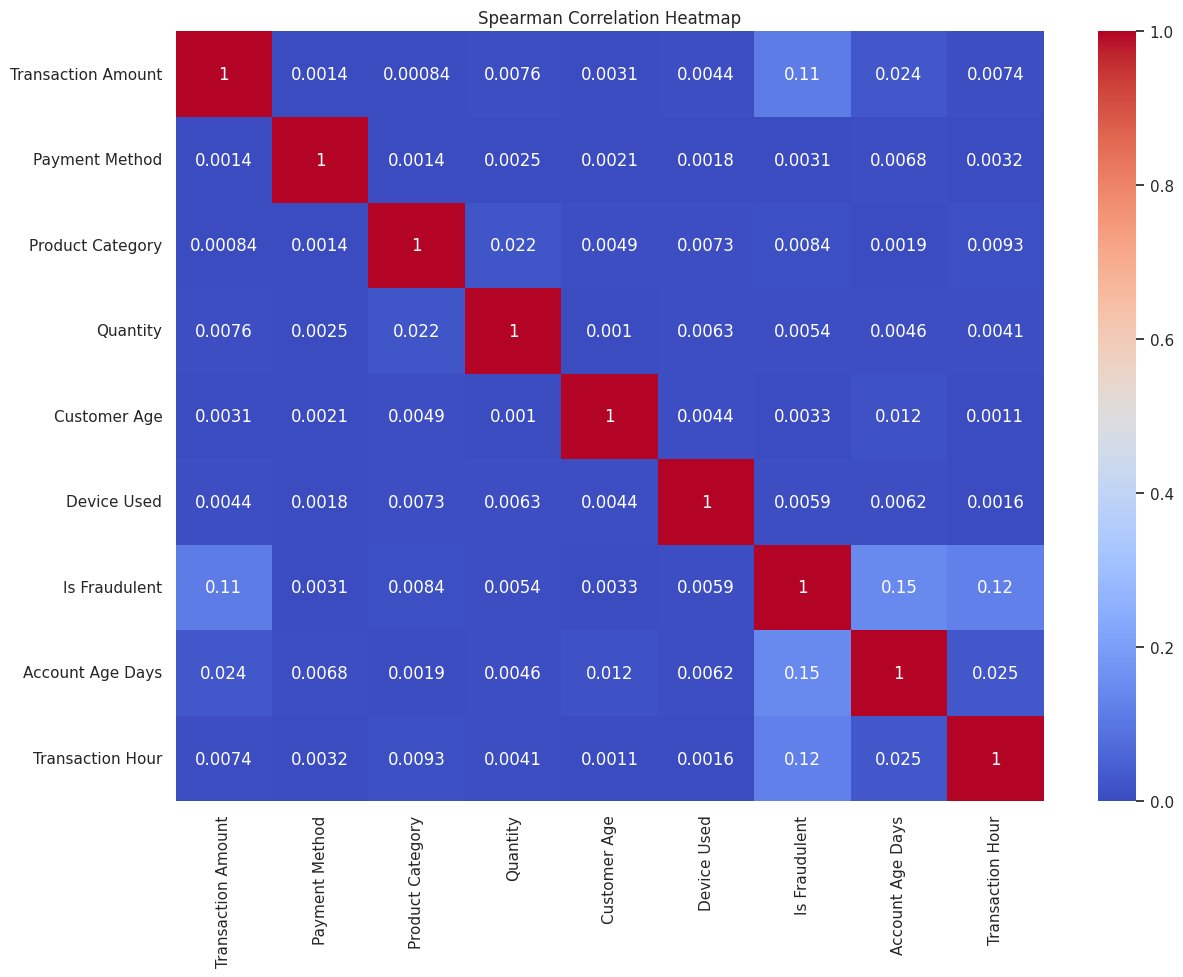

In [ ]:
corr_matrix = df_encoded.corr('spearman').abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Spearman| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Spearman| > 0.8):


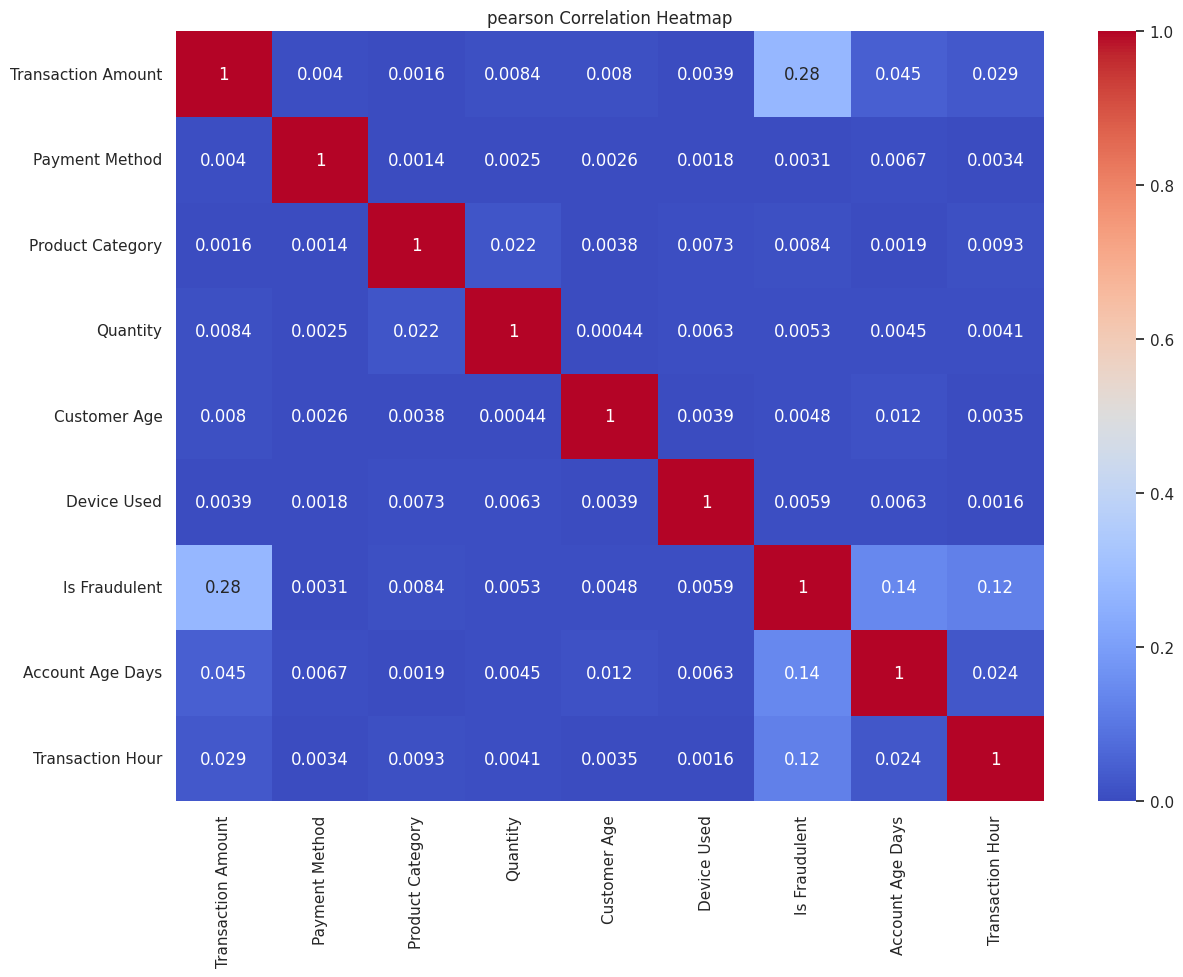

In [ ]:
corr_matrix = df_encoded.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("pearson Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Pearson| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Pearson| > 0.8):


no other pair is above the typical thresholds (0.8 or 0.9) for multicollinearity.

In [ ]:

numerical_df = df_encoded.select_dtypes(include=np.number)
variances = numerical_df.var()
print("Feature Variances:")
display(variances)

# Set a variance threshold (you can adjust this value)
variance_threshold = 0.01


low_variance_numerical_features = variances[variances < variance_threshold].index.tolist()

print(f"\nNumerical features with variance below {variance_threshold}:")
print(low_variance_numerical_features)


if low_variance_numerical_features:
    df_encoded = df_encoded.drop(columns=low_variance_numerical_features)
    print(f"\nDropped low variance numerical columns: {low_variance_numerical_features}")
else:
    print("\nNo numerical features found with variance below the threshold.")

display(df_encoded.info())

Feature Variances:


,0
Transaction Amount,79550.323489
Payment Method,1.245141
Product Category,1.996852
Quantity,2.015444
Customer Age,100.189516
Device Used,0.668723
Is Fraudulent,0.049034
Account Age Days,11532.329093
Transaction Hour,48.729597



Numerical features with variance below 0.01:
[]

No numerical features found with variance below the threshold.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction Amount  23634 non-null  float64
 1   Payment Method      23634 non-null  int64  
 2   Product Category    23634 non-null  int64  
 3   Quantity            23634 non-null  int64  
 4   Customer Age        23634 non-null  int64  
 5   Device Used         23634 non-null  int64  
 6   Is Fraudulent       23634 non-null  int64  
 7   Account Age Days    23634 non-null  int64  
 8   Transaction Hour    23634 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.6 MB


None

In [ ]:
df_encoded.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,3,4,1,40,2,0,282,23
1,301.34,2,4,3,35,1,0,223,0
2,340.32,1,3,5,29,2,0,360,8
3,95.77,2,4,5,45,0,0,325,20
4,77.45,2,2,5,42,2,0,116,15


In [ ]:

df_encoded.to_csv('processed_fraud_data.csv', index=False)

print("Processed DataFrame saved to 'processed_fraud_data.csv'")

Processed DataFrame saved to 'processed_fraud_data.csv'
